[[0.00000000e+00 1.23460000e+04 1.00000000e+00 3.25000000e+02
  7.71836000e+04]
 [1.00000000e+00 1.23470000e+04 7.00000000e+00 3.66000000e+02
  6.15714286e+02]
 [2.00000000e+00 1.23480000e+04 4.00000000e+00 3.57000000e+02
  4.49310000e+02]
 ...
 [4.33500000e+03 1.82820000e+04 2.00000000e+00 1.25000000e+02
  8.90250000e+01]
 [4.33600000e+03 1.82830000e+04 1.60000000e+01 3.36000000e+02
  1.30930000e+02]
 [4.33700000e+03 1.82870000e+04 3.00000000e+00 2.01000000e+02
  6.12426667e+02]]
[[0.00000000e+00 1.57947023e-01 1.27933762e-05 4.15784727e-03
  9.87438834e-01]
 [8.08553769e-05 9.98321339e-01 5.65987638e-04 2.95930680e-02
  4.97838106e-02]
 [1.61794902e-04 9.98921725e-01 3.23589804e-04 2.88803900e-02
  3.63480337e-02]
 ...
 [2.30713311e-01 9.72987487e-01 1.06442127e-04 6.65263297e-03
  4.73800520e-03]
 [2.30716879e-01 9.72831344e-01 8.51353798e-04 1.78784298e-02
  6.96673455e-03]
 [2.30626438e-01 9.72438475e-01 1.59529470e-04 1.06884745e-02
  3.25667006e-02]]


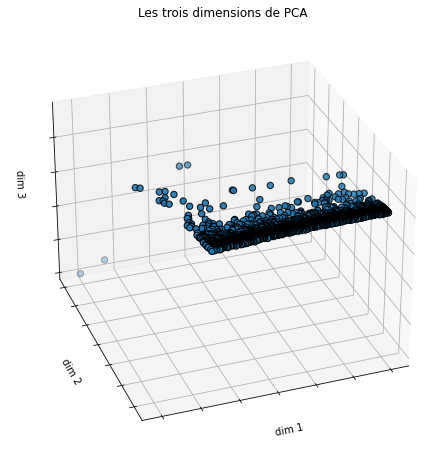

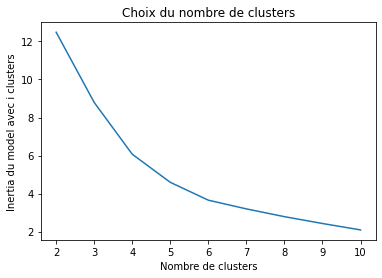

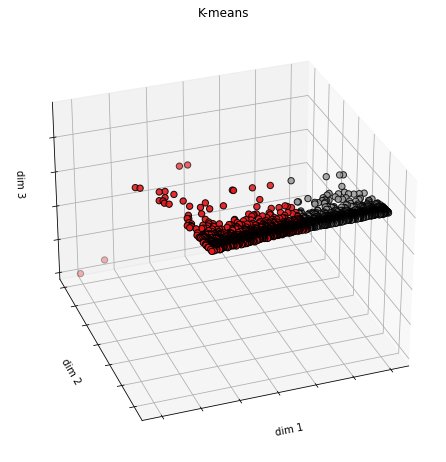

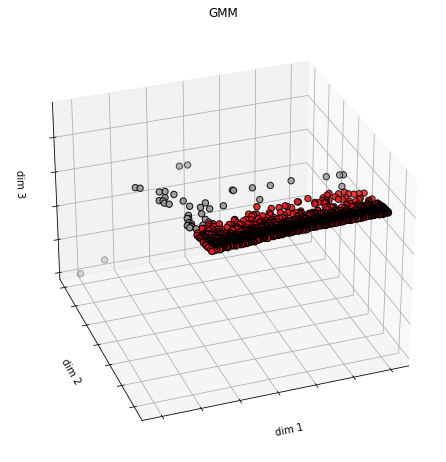

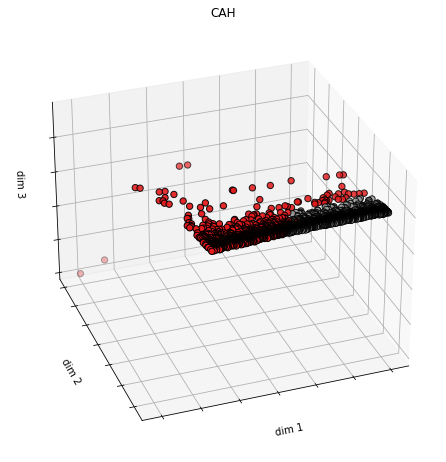

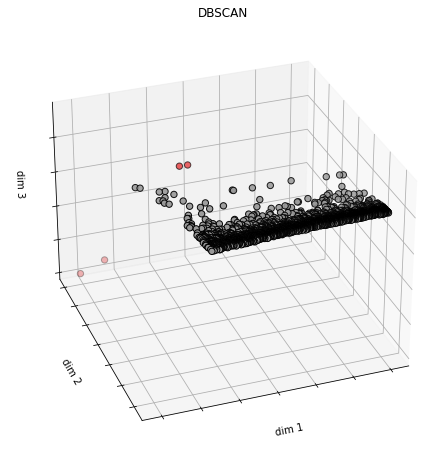

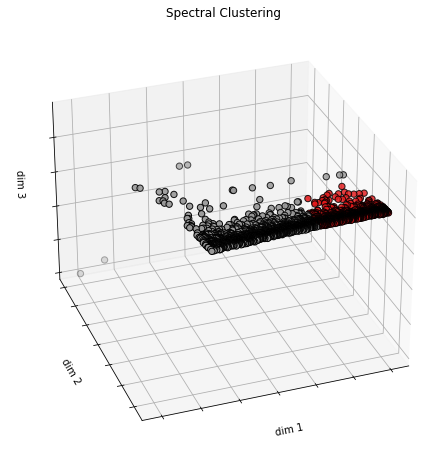

{'k-means': 0.5663185368250806, 'GMM': 0.724879000429427, 'CAH': 0.5535290128691444, 'DBSCAN': 0.9132954184354545, 'SpectralClustering': 0.555126485941821}
{'k-means': 0.0615, 'GMM': 0.0076, 'CAH': 0.6207, 'DBSCAN': 0.3726, 'SpectralClustering': 0.7902}


In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering,SpectralClustering,DBSCAN, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from scipy.cluster import hierarchy
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
import time

#Dictionnaire des score de toutes les méthodes
silhouette_dict = {}

#Calcul des temps d'exécutions

temps = {}

#Chargement de la dataset 
#df = pd.read_csv('Wholesale_customers_data.csv')
df = pd.read_csv('rfm_data.csv')
#Récupération des données
data = df.values

print(data)
data = normalize(data)
print(data)


# plot des données en utilisant PCA dimensions (3D)
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("Les trois dimensions de PCA")
ax.set_xlabel("dim 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("dim 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("dim 3")
ax.w_zaxis.set_ticklabels([])
plt.show()




# Choix du nombre de clusters en utilisant l'inertia

nb_clusters = [2, 3 ,4 ,5 ,6 ,7 ,8, 9 ,10]
iner = []
for clus in nb_clusters:
    kmeans = KMeans(n_clusters=clus, random_state=10).fit(data)
    iner.append(kmeans.inertia_)

    
plt.figure(2)
plt.plot(nb_clusters,iner)
plt.title("Choix du nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertia du model avec i clusters")
plt.show()


#Utilisation de PCA pour décomposer les données
pca = PCA(n_components=3).fit_transform(data)


#mesure de temps d'exécution
start = time.time()
# Application de K-means
kmeans = KMeans(n_clusters=2, random_state=10).fit(data)
y = kmeans.fit_predict(data)

end = time.time()

temps['k-means']= round((end - start)/2,4)
#Calcul de silhouette
silhouette_dict['k-means'] =  silhouette_score(pca, y)

# plot des données en utilisant K-means
fig = plt.figure(3, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c = y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("K-means")
ax.set_xlabel("dim 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("dim 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("dim 3")
ax.w_zaxis.set_ticklabels([])
plt.show()


#mesure de temps d'exécution
start = time.time()
# Application de GMM

gmm = GaussianMixture(n_components=2,covariance_type = 'spherical').fit(data)
y=gmm.predict(data)

end = time.time()

temps['GMM']= round((end - start)/2,4)
#Calcul de silhouette
silhouette_dict['GMM'] =  silhouette_score(pca, y)  

# plot des données en utilisant GMM
fig = plt.figure(4, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c = y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("GMM")
ax.set_xlabel("dim 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("dim 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("dim 3")
ax.w_zaxis.set_ticklabels([])
plt.show()




#mesure de temps d'exécution
start = time.time()
# Application de CAH

cah = AgglomerativeClustering(distance_threshold=None, n_clusters=2, linkage='ward').fit(data)
y = cah.fit_predict(data)


end = time.time()

temps['CAH']= round((end - start)/2,4)
#Calcul de silhouette
silhouette_dict['CAH'] =  silhouette_score(pca, cah.labels_)

# plot des données en utilisant CAH
fig = plt.figure(5, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c = y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("CAH")
ax.set_xlabel("dim 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("dim 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("dim 3")
ax.w_zaxis.set_ticklabels([])
plt.show()



#mesure de temps d'exécution
start = time.time()
#Application de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=8, metric='euclidean').fit(data)
y = dbscan.fit_predict(data)


end = time.time()

temps['DBSCAN']= round((end - start)/2,4)
#Calcul de silhouette
silhouette_dict['DBSCAN'] =  silhouette_score(pca, y)

# plot des données en utilisant DBSCAN
fig = plt.figure(6, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c = y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("DBSCAN")
ax.set_xlabel("dim 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("dim 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("dim 3")
ax.w_zaxis.set_ticklabels([])
plt.show()



#mesure de temps d'exécution
start = time.time()
#Application de SpectralClustering
spect_model = SpectralClustering(n_clusters=2, n_init=10, gamma=-0.2, affinity='nearest_neighbors', n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1).fit(data)
y = spect_model.fit_predict(data)

end = time.time()

temps['SpectralClustering']= round((end - start)/2,4)
#Calcul de silhouette
silhouette_dict['SpectralClustering'] =  silhouette_score(pca, y)

# plot des données en utilisant DBSCAN
fig = plt.figure(7, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c = y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("Spectral Clustering")
ax.set_xlabel("dim 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("dim 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("dim 3")
ax.w_zaxis.set_ticklabels([])
plt.show()

print(silhouette_dict)
print(temps)